#  By- Gyan Bahadur Magar
# The Sparks Foudation - Intership (Feb 2021)
# Task Two - Prediction using Unsupervised ML
# Predict the optimum number of clusters and represent it visually.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the csv dataset
iris=pd.read_csv("Z:\intro\\task2_iris.csv")

In [3]:
"""Printing first five rows"""
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris=iris.drop('Id',axis=1) # here it is irrelavent

#  after dropping the Id  now the records looks like this 

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Sanity check - checking whether there is null values 


In [6]:
iris.isnull().sum()/iris.shape[0]

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

##### we found no null values on the records. Now we can go for visualization and analysis

### For visualization we are using Seaborn 
### Here sb is alias for seaborn you can use alias as your wish sb, sns ...

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

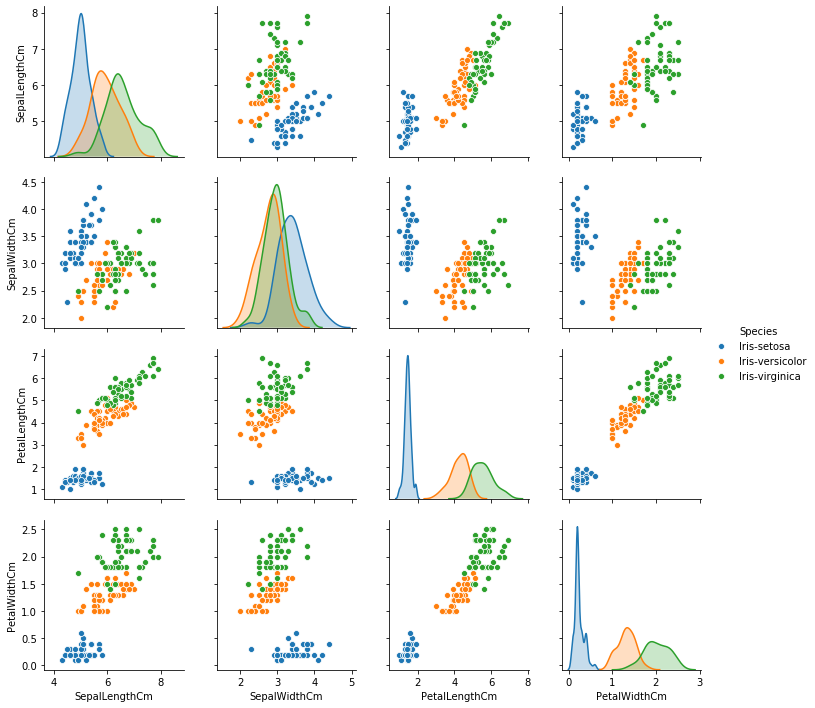

In [8]:
sb.pairplot(iris , hue = 'Species') #pair plot
plt.show()

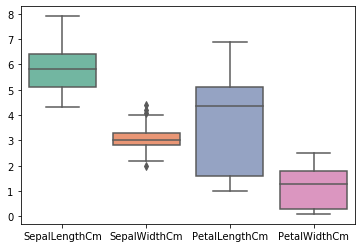

In [9]:
ax = sb.boxplot(data=iris, orient="v", palette="Set2")

In [10]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

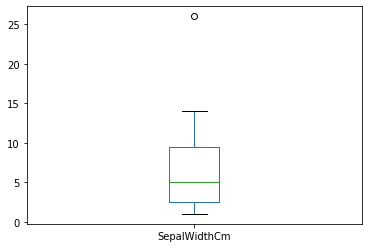

In [11]:
iris['SepalWidthCm'].value_counts().plot(kind='box');

## Finding the optimum number of clusters for k-means classification

#### There is an outlier on SepalWidthCm record but it seem negligible

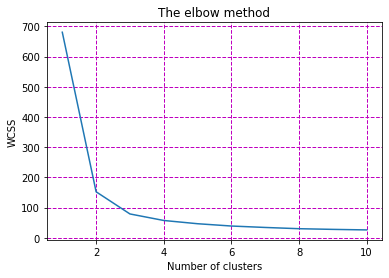

In [19]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
'''Plotting the results onto a line graph''' 
'''allowing us to observe The elbow'''
plt.plot(range(1, 11), wcss) # we can use markers also
plt.grid(color='m', linestyle='--', linewidth=1)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##  The optimum clusters is where the elbow occurs. So, here between 2 and 4 (i.e. 3) the bend occurs so the optimum cluster is 3.

In [13]:
"""Now we are applying K-Means on the dataset"""
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

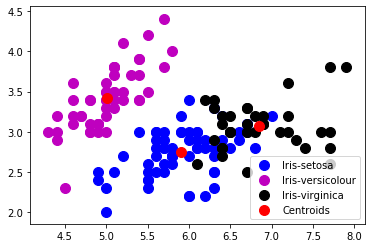

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'b', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'm', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'k', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend();

# LogisticRegression

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [16]:
# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto') 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0
